#### Data preparation

In [4]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [5]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

print(f"x.shape: {x.shape}")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(f"x_train shape: {x_train.shape} x_test.shape: {x_test.shape}")

x.shape: (569, 30)
x_train shape: (455, 30) x_test.shape: (114, 30)


#### Cross Validation

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Fold: Training in 10 gleich große Teile aufteilen aufteilen (1 Validierungsset, 2 Trainigsset)

In [7]:
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=2)

scores = cross_val_score(clf, x_train, y_train, cv=kf, n_jobs=-1)
predictions = cross_val_predict(clf, x_train, y_train, cv=kf, n_jobs=-1)
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Accuracies: {scores}")
print(f"Mean Score: {mean_score}")
print(f"Std Score: {std_score}")

Accuracies: [0.97826087 0.93478261 0.95652174 0.86956522 0.84782609 0.93333333
 0.84444444 0.91111111 0.88888889 0.93333333]
Mean Score: 0.9098067632850242
Std Score: 0.043326115976493135


In [8]:
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(clf, x_train, y_train, cv=kf, n_jobs=-1)
predictions = cross_val_predict(clf, x_train, y_train, cv=kf, n_jobs=-1)
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Accuracies: {scores}")
print(f"Mean Score: {mean_score}")
print(f"Std Score: {std_score}")

Accuracies: [1.         0.89130435 0.91304348 0.91304348 0.91304348 0.95555556
 0.93333333 0.95555556 0.86666667 0.88888889]
Mean Score: 0.9230434782608696
Std Score: 0.037140962503793375


In [9]:
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=4)

scores = cross_val_score(clf, x_train, y_train, cv=kf, n_jobs=-1)
predictions = cross_val_predict(clf, x_train, y_train, cv=kf, n_jobs=-1)
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Accuracies: {scores}")
print(f"Mean Score: {mean_score}")
print(f"Std Score: {std_score}")

Accuracies: [0.93478261 0.95652174 0.91304348 0.93478261 0.82608696 0.91111111
 0.97777778 0.84444444 0.95555556 0.91111111]
Mean Score: 0.9165217391304348
Std Score: 0.04581167341908331


### Visualization

bezogen auf das letzte Model

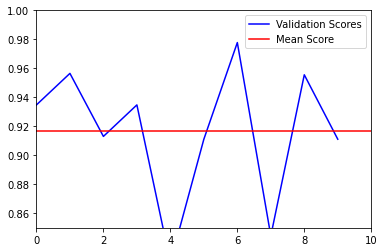

In [10]:
plt.plot(range(len(scores)), scores, color="blue")
plt.xlim(0, 10)
plt.ylim(0.85, 1)
plt.axhline(mean_score, linestyle="-", color="red") # Horizontale Linie
plt.legend(["Validation Scores", "Mean Score"])
plt.show()